In [1]:
! echo 'hello'

hello


In [2]:
! cd /Users/equaglio/Decider/decider-genetics
! rm -f poetry.lock # remove any `poetry.lock` file already present in the folder

If current python version is not compatible, you can install the need version as expressed in `pyproject.toml` file: 

In [3]:
! cat pyproject.toml

[tool.poetry]
name = "decider-genetics"
version = "0.1.3"
description = "Exports from tables to Semantic Knowledge Graphs, with a simple declarative mapping."
authors = ["Johann Dreo <johann.dro@pasteur.fr>, Marko Baric <marko.baric@pasteur.fr>, Claire Laudy <claire.laudy@thalesgroup.com>, Matthieu Najm <matthieu.najm@pasteur.fr>, Benno Schwikowski <benno.schwikowski@pasteur.fr>"]
readme = "README.md"
packages = [
    { include = "ontoweaver", from = "/Users/equaglio/Decider/Ontoweaver/src" }
]

[tool.poetry.dependencies]
python = "^3.12"
biocypher = "^0.9.1"
pooch = "^1.7.0" # Dep of biocypher
pandas = "^2.0.1"
numpy = "^2.1.3"
owlready2 = "^0.47"
jsonargparse = "^4.35"
xdg-base-dirs = "^6.0.2"
pandera = { version = "^0.23.1", extras = ["io"] }
ipykernel = "^6.29.5"

[tool.poetry.group.dev.dependencies]
pytest = "^8.3.4"
sphinx_rtd_theme = "^3.0.2"

[build-system]
requires = ["poetry-core"]
build-backend = "poetry.core.masonry.api"

[tool.pytest.ini_options]
addopts = [
    "--import-

If you have multiple python versions installed you can direct *poetry* to use the correct one with the following command:

In [4]:
! poetry env use $(which python3.12)

Using virtualenv: /Users/equaglio/Library/Caches/pypoetry/virtualenvs/decider-genetics-QA_7G8QC-py3.12


And finally install *poetry*:

In [5]:
! poetry install

Updating dependencies
Resolving dependencies... (1.0s)

No dependencies to install or update

Writing lock file

Installing the current project: decider-genetics (0.1.3)Installing the current project: decider-genetics (0.1.3)


In [6]:
! poetry update

Updating dependencies
Resolving dependencies... (0.8s)

No dependencies to install or update


Now to actually start the *poetry* environment:

In [7]:
! eval $(poetry env activate) # new implementation of `poetry shell`
! poetry env info


Virtualenv
Python:         3.12.10
Implementation: CPython
Path:           /Users/equaglio/Library/Caches/pypoetry/virtualenvs/decider-genetics-QA_7G8QC-py3.12
Executable:     /Users/equaglio/Library/Caches/pypoetry/virtualenvs/decider-genetics-QA_7G8QC-py3.12/bin/python
Valid:          True

Base
Platform:   darwin
OS:         posix
Python:     3.12.10
Path:       /opt/homebrew/opt/python@3.12/Frameworks/Python.framework/Versions/3.12
Executable: /opt/homebrew/opt/python@3.12/Frameworks/Python.framework/Versions/3.12/bin/python3.12


In [8]:
! pwd
! which python

/Users/equaglio/Decider/decider-genetics
/Users/equaglio/.pyenv/shims/python


In [9]:
! ls
! poetry check

Dockerfile                            decider_genetics
LICENSE                               docker
README.md                             docker-compose-next.yml
Screenshot 2025-05-15 at 11.47.56.png docker-compose.yml
Screenshot 2025-05-15 at 11.48.23.png docker-variables.env
Screenshot 2025-05-15 at 11.48.38.png import.report
biocypher-log                         old
biocypher-out                         poetry.lock
config                                pyproject.toml
create_knowledge_graph.py             scripts
data                                  vignette.ipynb
If you want to set the version dynamically via `poetry build --local-version` or you are using a plugin, which sets the version dynamically, you should define the version in [tool.poetry] and add 'version' to [project.dynamic].
If you want to define multiple readmes, you should define them in [tool.poetry] and add 'readme' to [project.dynamic].


In [10]:
! poetry show

alabaster                     1.0.0       A light, configurable Sphinx theme
annotated-types               0.7.0       Reusable constraint types to use ...
appdirs                       1.4.4       A small Python module for determi...
appnope                       0.1.4       Disable App Nap on macOS >= 10.9
asttokens                     3.0.0       Annotate AST trees with source co...
attrs                         25.3.0      Classes Without Boilerplate
babel                         2.17.0      Internationalization utilities
biocypher                     0.9.6       A unifying framework for biomedic...
black                         25.1.0      The uncompromising code formatter.
certifi                       2025.4.26   Python package for providing Mozi...
chardet                       5.2.0       Universal encoding detector for P...
charset-normalizer            3.4.2       The Real First Universal Charset ...
click                         8.1.8       Composable command line interface

In [11]:
# mapping files
! ls -R decider_genetics/adapters/

my_mapping_1_variants.yaml
my_mapping_1_variants_solve_inverse_property_patients.yaml
my_mapping_1_variants_solve_inverse_property_variants.yaml
my_mapping_2_clinical.yaml
my_mapping_2_variants.yaml
my_mapping_3_clinical.yaml
my_mapping_3_cna.yaml
my_mapping_3_variants.yaml


In [12]:
import sys
print(sys.executable)
! which python
#sys.path.append("/Users/equaglio/Decider/Ontoweaver/src")

/Users/equaglio/Library/Caches/pypoetry/virtualenvs/decider-genetics-QA_7G8QC-py3.12/bin/python
/Users/equaglio/.pyenv/shims/python


In [13]:
! poetry add ipykernel # package for using poetry with jupyter notebook

The following packages are already present in the pyproject.toml and will be skipped:

  - ipykernel

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


To point the kernel of the notebook to the poetry environment activated:

In [14]:
 ! poetry run python -m ipykernel install --user --name=my-poetry-env --display-name "decider genetics poetry env"

Installed kernelspec my-poetry-env in /Users/equaglio/Library/Jupyter/kernels/my-poetry-env


### /<u>!</u>\  Now change kernel and make sure to use "decider genetics poetry env" before running next cell

In [1]:
import argparse
import logging
import pandas as pd
import yaml
from biocypher import BioCypher
import ontoweaver

INFO -- This is BioCypher v0.9.6.
INFO -- Logging into `biocypher-log/biocypher-20250523-102846.log`.


## SKG construction

We want to build a KG with the following schema:

<a id='schema_graph_picture_1'></a>

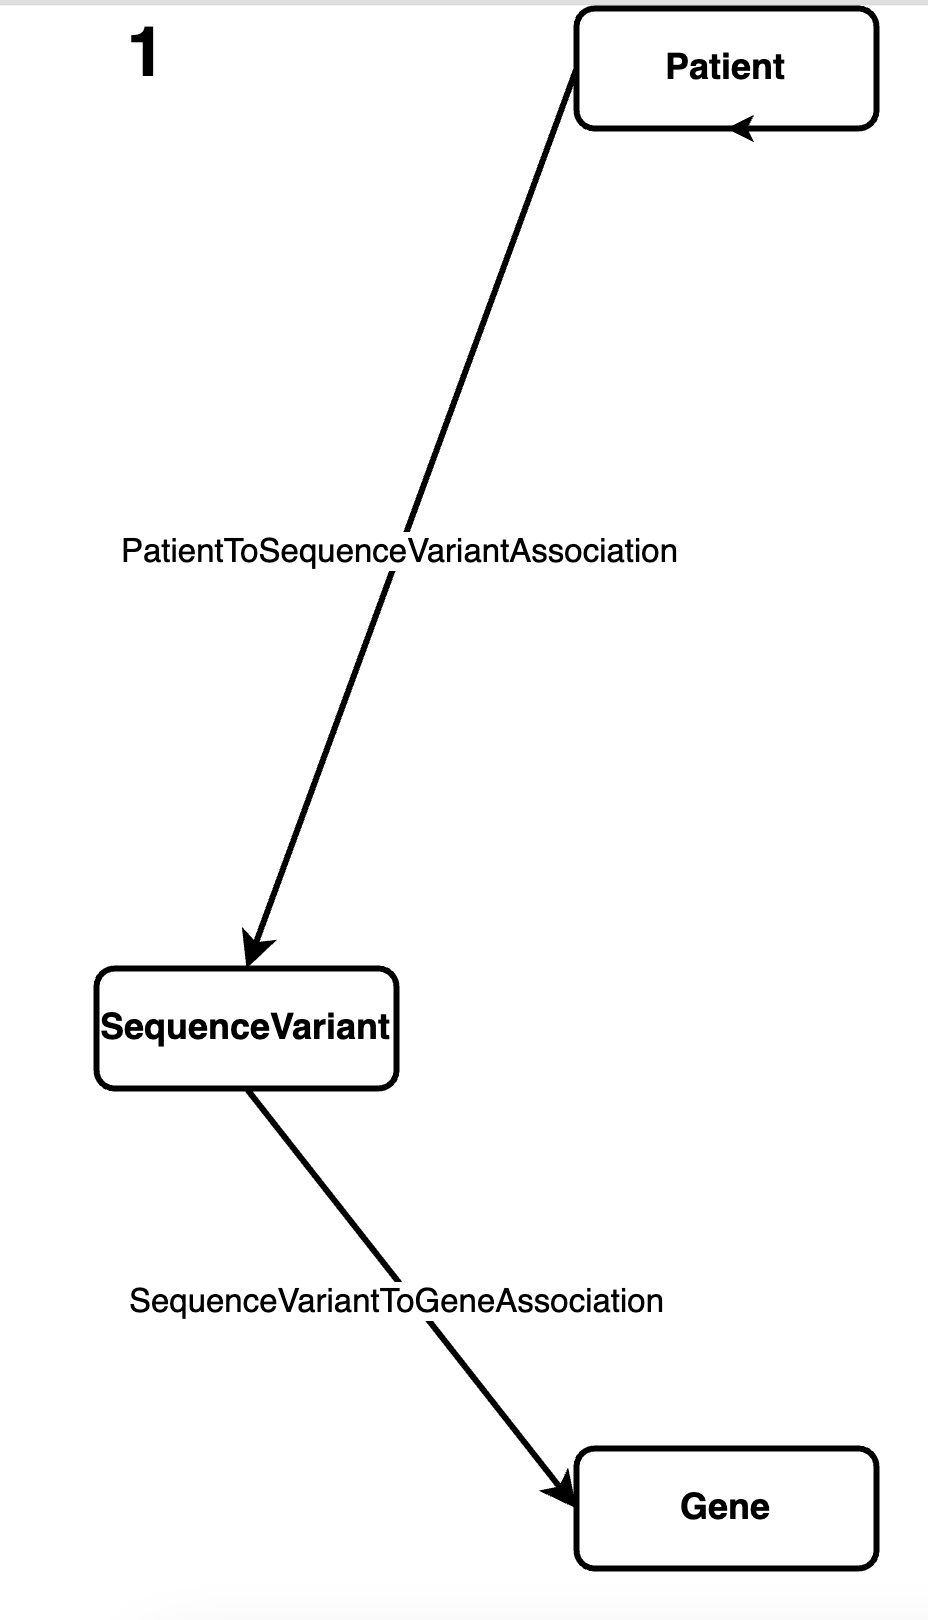

In [2]:
# ![Screenshot 2025-05-15 at 11.47.56.png](<attachment:Screenshot 2025-05-15 at 11.47.56.png>)
from IPython.display import Image, display
display(Image("Screenshot 2025-05-15 at 11.47.56.png", width=200))

In [3]:
# tables in data/
! ls -R data

oncodash files                         synthetic_cna.csv
oncokb_biomarker_drug_associations.tsv synthetic_variants.csv
synthetic_clinical.csv

data/oncodash files:
BiologicalProcess-part000.csv       GeneToBiologicalProcess-part000.csv


All entites required are present in the `synthetic_variants.csv` table:

In [4]:
variants_df=pd.read_table('data/synthetic_variants.csv')
variants_df.head(n=5)

,patient,CHROM,POS,REF,ALT,ID,FILTER,cytoBand,Func.MANE,Gene.MANE,...,gnomAD_genome_FIN,gnomAD_genome_max,gnomAD_exome_nc_ALL,gnomAD_exome_nc_NFE,gnomAD_exome_nc_NFE_SWE,gnomAD_exome_nc_FIN,gnomAD_exome_nc_max,Truncal,readCounts,samples
0,patient1,chr8,32660776,T,A,.,PASS,8p12,intronic,NRG1,...,.,.,.,.,.,.,.,heterogeneous,"38,0;21,0;26,13;37,1",patient1_Per
1,patient1,chr20,40688333,G,C,.,PASS,20q12,exonic,MAFB,...,.,.,.,.,.,.,.,homogeneous,"65,0;70,17;30,5;62,9;58,7",patient1_Lum;patient1_Per
2,patient1,chr2,197391056,CAGTAAA,C,.,PASS,2q33.1,UTR3,SF3B1,...,.,.,.,.,.,.,.,heterogeneous,"30,0;29,17;77,0;60,0;44,0",patient1_Per;patient1_Ome
3,patient1,chrX,124089869,G,T,.,PASS,Xq25,intronic,STAG2,...,.,.,.,.,.,.,.,heterogeneous,"34,0;33,0;45,0;22,3;28,7",patient1_Asc;patient1_Lum
4,patient1,chr6,151916206,G,A,rs977154062,PASS,6q25.1,intronic,ESR1,...,0,9.52064e-05,.,.,.,.,.,homogeneous,"58,0;21,6",patient1_Lum;patient1_Asc;patient1_Per;patient...


In [5]:
variants_df.columns

Index(['patient', 'CHROM', 'POS', 'REF', 'ALT', 'ID', 'FILTER', 'cytoBand',
       'Func.MANE', 'Gene.MANE', 'GeneDetail.MANE', 'ExonicFunc.MANE',
       'AAChange.MANE', 'Func.refGene', 'Gene.refGene', 'GeneDetail.refGene',
       'ExonicFunc.refGene', 'AAChange.refGene', 'genomicSuperDups',
       'dbscSNV_ADA_SCORE', 'dbscSNV_RF_SCORE', 'COSMIC_ID',
       'COSMIC_OCCURRENCE', 'COSMIC_TOTAL_OCC', 'COSMIC_CONF_SOMA', 'CLNSIG',
       'CLNSIGCONF', 'CLNDN', 'CLNREVSTAT', 'CLNALLELEID', 'CLNDISDB',
       'Interpro_domain', 'regulomeDB', 'CADD_raw', 'CADD_phred', '1000G_ALL',
       '1000G_EUR', 'gnomAD_genome_ALL', 'gnomAD_genome_NFE',
       'gnomAD_genome_FIN', 'gnomAD_genome_max', 'gnomAD_exome_nc_ALL',
       'gnomAD_exome_nc_NFE', 'gnomAD_exome_nc_NFE_SWE', 'gnomAD_exome_nc_FIN',
       'gnomAD_exome_nc_max', 'Truncal', 'readCounts', 'samples'],
      dtype='object')

### Here we show how to write a proper schema config:

In [6]:
! cat config/schema_config_1.yaml


sequence variant: # The type in Biolink
    represented_as: node
    label_in_input: SequenceVariant

# Another node type (e.g. of a column of the table).
patient: # Existing in Biolink under another name.
    represented_as: node
    label_in_input: Patient
    synonym_for: case # Actual name in Biolink.

gene: # The type in Biolink
  represented_as: node
  label_in_input: Gene

patient has variant: # Not existing in Biolink…
    # … thus added by Biocypher under:
    is_a: case to phenotypic feature association
    represented_as: edge
    label_in_input: PatientToSequenceVariantAssociation
    source: patient
    target: sequence variant

variant to gene association: #The type in BioLink
    represented_as: edge
    label_in_input: SequenceVariantToGeneAssociation
    source: sequence variant
    target: gene

The schema configuration file specifies the nodes type and edges type in the Semantic Knowledge Graph. The type can either come directly from a chosen ontology (specified in the `biocypher_config.yaml` file) or be added to the ontology as a subclass (`is_a` key).
For each type, the quality of node or edge is specified by the `represented_as` key. Finally, the `label_in_input` key allows us to use a different label for the types in our adapters. In this vignette, we will stick to the labels present in nodes and edges of the graph in [Schema Graph Picture]('schema_graph_picture_1). 
Each edge type needs the specification of a source and target node type.

### Here we show how to write a proper mapping
TODO: highlight and show problem of consistency of direction between predicate as defined in the ontology (pointed to in the biocypher_config file) and subject-object assignment in the ontoweaver mapping:
    
    Issues:
* apparently biocypher has no way to declare inverse property
* it's not clear to me if and why (conceptually) we shouldn't be able to treat rowIndex as object and another column as subject (other than forcing the user to always have a subject when they define the mapping).
* we could add an inverse property on our ontology for example with protege as we create subclasses through biocypher, but personalizing the ontology through 2 different tools is not as convenient/easy.

In [7]:
# Edit the biocypher config to point to the new schema_config file

with open('config/biocypher_config.yaml', 'r') as f:
    bc = yaml.safe_load(f)

bc['biocypher']['schema_config_path'] = 'schema_config_1.yaml'

with open('config/biocypher_config.yaml', 'w') as f:
    yaml.dump(bc, f, default_flow_style=False)

In [8]:
#    #import decider_genetics.adapters.preprocessing_dataframes as preprocess_df
#    #import decider_genetics.adapters.preprocessing_variants as preprocess_snv
#    
#    
#    bc = BioCypher(
#        biocypher_config_path="config/biocypher_config.yaml",
#        schema_config_path="config/schema_config_1.yaml"
#    )
#    
#    # Actually extract data.
#    nodes = []
#    edges = []
#    
#    data_mappings = {}
#    
#    logging.info(f"Weave synthetic variants data")
#    
#    #variants_df = pd.read_csv('data/', sep='\t')
#    
#    mapping_file = "./decider_genetics/adapters/my_mapping_1_variants.yaml"
#    with open(mapping_file) as fd:
#        conf = yaml.full_load(fd)
#    
#    adapter = ontoweaver.tabular.extract_table(df=variants_df, config=conf,separator = None, affix= "none")
#    
#    nodes += adapter.nodes
#    edges += adapter.edges
#    
#    logging.info(f"Wove variants: {len(nodes)} nodes, {len(edges)} edges.")

#    # Write everything.
#    n, e = ontoweaver.extract(data_mappings)
#    nodes += n
#    edges += e

#    import_file = ontoweaver.reconciliate_write(nodes, edges, "config/biocypher_config.yaml", "config/schema_config_1.yaml", separator=", ")
#    # bc.write_schema_info(as_node=True)
# 
#    print(import_file)

## Here below, an attempt to force Ontoweaver to set rowIndex as object (but it doesn't work so new fea)

In [9]:
#    #import decider_genetics.adapters.preprocessing_dataframes as preprocess_df
#    #import decider_genetics.adapters.preprocessing_variants as preprocess_snv
#    
#    
#    bc = BioCypher(
#        biocypher_config_path="config/biocypher_config.yaml",
#        schema_config_path="config/schema_config_1.yaml"
#    )
#    
#    # Actually extract data.
#    nodes = []
#    edges = []
#    
#    data_mappings = {}
#    
#    logging.info(f"Weave synthetic variants data")
#    
#    #variants_df = pd.read_csv('data/', sep='\t')
#    
#    
#    # Patient to SequenceVariant
#    mapping_file = "./decider_genetics/adapters/my_mapping_1_variants_solve_inverse_property_patients.yaml"
#    with open(mapping_file) as fd:
#        conf = yaml.full_load(fd)
#    
#    adapter = ontoweaver.tabular.extract_table(df=variants_df, config=conf,separator = None, affix= "none")
#    
#    nodes += adapter.nodes
#    edges += adapter.edges
#    
#    
#    # SequenceVariant to Gene
#    mapping_file = "./decider_genetics/adapters/my_mapping_1_variants_solve_inverse_property_variants.yaml"
#    with open(mapping_file) as fd:
#        conf = yaml.full_load(fd)
#    
#    adapter = ontoweaver.tabular.extract_table(df=variants_df, config=conf,separator = None, affix= "none")
#    
#    nodes += adapter.nodes
#    edges += adapter.edges
#    
#    logging.info(f"Wove variants: {len(nodes)} nodes, {len(edges)} edges.")
#    
#    # # Write everything.
#    # n, e = ontoweaver.extract(data_mappings)
#    # nodes += n
#    # edges += e

#    import_file = ontoweaver.reconciliate_write(nodes, edges, "config/biocypher_config.yaml", "config/schema_config_1.yaml", separator=", ")
#    # bc.write_schema_info(as_node=True)
#    
#    print(import_file)

## Here, we momentarily neglect the relationship direction issue, and run ontoweaver on the first dataset with no properties.

In [10]:
#import decider_genetics.adapters.preprocessing_dataframes as preprocess_df
#import decider_genetics.adapters.preprocessing_variants as preprocess_snv


bc = BioCypher(
    biocypher_config_path="config/biocypher_config.yaml",
    schema_config_path="config/schema_config_1.yaml"
)

# Actually extract data.
nodes = []
edges = []

data_mappings = {}

logging.info(f"Weave synthetic variants data")

#variants_df = pd.read_csv('data/', sep='\t')


# SequenceVariant to Gene
mapping_file = "./decider_genetics/adapters/my_mapping_1_variants.yaml"
with open(mapping_file) as fd:
    conf = yaml.full_load(fd)

adapter = ontoweaver.tabular.extract_table(df=variants_df, config=conf,separator = None, affix= "none")

nodes += adapter.nodes
edges += adapter.edges

logging.info(f"Wove variants: {len(nodes)} nodes, {len(edges)} edges.")

# # Write everything.
# n, e = ontoweaver.extract(data_mappings)
# nodes += n
# edges += e

import_file = ontoweaver.reconciliate_write(nodes, edges, "config/biocypher_config.yaml", "config/schema_config_1.yaml", separator=", ")
# bc.write_schema_info(as_node=True)

print(import_file)

INFO -- Running BioCypher with schema configuration from config/schema_config_1.yaml.


TypeError: attribute name must be string, not 'NoneType'

Describe

In [ ]:
! pwd

In [ ]:
! ls -R biocypher-out

### `neo4j` database naming consistency
The community version of `neo4j` can handle just one database. Make sure the name of the database created by default is the same as present in the `.sh` file output by `ontoweaver` (`test`). To do this, go to conf/neo4j.conf in the folder where you have installed `neo4j`, and assign `initial.dbms.default_database=test`, or you can run:

In [ ]:
import os

# Path to the neo4j.conf file
neo4j_path = os.popen('where neo4j' if os.name == 'nt' else 'which neo4j').read().strip()
conf_dir = os.path.abspath(os.path.join(os.path.dirname(neo4j_path), '..', 'conf'))
conf_file = os.path.join(conf_dir, 'neo4j.conf')

# Key to modify
key = 'initial.dbms.default_database'
new_value = 'test' # Change value according to the database name as present in the .sh file output by biocypher.

# Read, modify, and write back
updated = False
lines = []

with open(conf_file, 'r') as f:
    for line in f:
        if line.strip().startswith(f'{key}='):
            lines.append(f'{key}={new_value}\n')
            updated = True
        else:
            lines.append(line)

if not updated:
    lines.append(f'{key}={new_value}\n')

# Write back safely
with open(conf_file, 'w') as f:
    f.writelines(lines)

print(f"Updated {key} in {conf_file}")


In [ ]:
! neo4j-admin server stop

In [ ]:
! neo4j stop

In [ ]:
! sed -i -e 's,bin/neo4j-admin,neo4j-admin,g' {import_file} 

In [ ]:
! sh {import_file}

In [ ]:
#! neo4j-admin server start # this for some reason does not work
! neo4j console # this one does

### In neo4j, use `MATCH (p)<-[r]-(v)-[l]->(g) RETURN p,r,v,l,g;` to visualize (part of) the SKG highlighting patient-variant-gene connection.

## /<u>!</u>\ Interrupt execution of previous block to gently shutdown neo4j server

In [ ]:
! neo4j status # to check, after some seconds, the effect of shutdown

In [ ]:
# in case shut down didnt work, run 
! ps aux | grep neo4j
# and then 
# kill <PID>
# where <PID> is the process identifier of the neo4j session

## Now let's add properties to those nodes

Patients properties are stored in `data/synthetic_clinical.csv`

In [ ]:
clinical_df = pd.read_table('data/synthetic_clinical.csv', sep=';')
clinical_df.head(n=5)

### We see there was inconsistence of decimal separator between BMI (comma) and Chemotherapy cycles (dot). This originates an error later on in neo4j so i set comma everywhere. Should be automatized since we are already specifying type of `BMI` in `schema_config.yaml` as `float`  

In [ ]:
# Edit the biocypher config to point to the new schema_config file

with open('config/biocypher_config.yaml', 'r') as f:
    bc = yaml.safe_load(f)

bc['biocypher']['schema_config_path'] = 'schema_config_2.yaml'

with open('config/biocypher_config.yaml', 'w') as f:
    yaml.dump(bc, f, default_flow_style=False)

#! cat config/biocypher_config.yaml

In [ ]:
#import decider_genetics.adapters.preprocessing_dataframes as preprocess_df
#import decider_genetics.adapters.preprocessing_variants as preprocess_snv


bc = BioCypher(
    biocypher_config_path="config/biocypher_config.yaml",
    schema_config_path="config/schema_config_2.yaml"
)

# Actually extract data.
nodes = []
edges = []

data_mappings = {}

logging.info(f"Weave synthetic variants data")

#variants_df = pd.read_csv('data/', sep='\t')

mapping_file = "./decider_genetics/adapters/my_mapping_2_variants.yaml"
with open(mapping_file) as fd:
    conf = yaml.full_load(fd)

adapter = ontoweaver.tabular.extract_table(df=variants_df, config=conf,separator = "\t", affix= "none")

nodes += adapter.nodes
edges += adapter.edges

logging.info(f"Wove variants: {len(nodes)} nodes, {len(edges)} edges.")



logging.info(f"Weave synthetic clinical data...")

mapping_file = "./decider_genetics/adapters/my_mapping_2_clinical.yaml"
with open(mapping_file) as fd:
    conf = yaml.full_load(fd)

adapter = ontoweaver.tabular.extract_table(df=clinical_df, config=conf,separator = "\t", affix= "none")

nodes += adapter.nodes
edges += adapter.edges

logging.info(f"Wove Clinical: {len(nodes)} nodes, {len(edges)} edges.")


# # Write everything.
# n, e = ontoweaver.extract(data_mappings)
# nodes += n
# edges += e

import_file = ontoweaver.reconciliate_write(nodes, edges, "config/biocypher_config.yaml", "config/schema_config_2.yaml", separator=", ")
# bc.write_schema_info(as_node=True)

print(import_file)


TO FIX!!! The previous attempt gives error, either with or without properties (tried cos there was apparently a bug in property parsing but later was fixed and i pulled onto my local ontoweaver repo so it shoud not be the problem...)

Same error also in the third schema version. 

In [ ]:
! ls -R biocypher-out

In [ ]:
# DO: substitute timestamp folder with the (last) one in `biocypher-out`
! sed -i -e 's,bin/neo4j-admin,neo4j-admin,g' biocypher-out/20250512185059/neo4j-admin-import-call.sh

In [ ]:
! sh biocypher-out/20250512185059/neo4j-admin-import-call.sh --verbose

In [ ]:
#! neo4j-admin server start # this for some reason does not work
! neo4j console # this one does

### In neo4j, use `MATCH (p)<-[r]-(v)-[l]->(g) RETURN p,r,v,l,g;` to visualize (part of) the SKG highlighting patient-variant-gene connection. Click on nodes to explore properties.

## And finally let's add a CopyNumberAlteration node connecting Patient and Gene as well.
Those alterations are store in Patients `data/synthetic_cns.csv`. Such tables store also information about the chromosome of location of genes present in the `synthetic_variants.csv` table, so we add it as gene property.

In [ ]:
cna_df = pd.read_table('data/synthetic_cna.csv', sep='\t')
cna_df.head(n=5)

In this case we could use the ID as identifier, but not knowing precicely what it represents, I used the most conservative approach of using the `rowIndex` as `ID`. This raises the problem of potential collision with the `ID`s of `sequence variant` nodes, that were inserted using `rowIndex` as `ID`. That's why I now define, in the `my_mapping_3_variants.yaml` the ID of the variants as a custom concatenation of thr 4 properies `CHROM`-`POS`-`REF`-`ALT`, deemed necessary and sufficient, in the present context, to univocally define each variant. (It's an example...)

In [ ]:
# Edit the biocypher config to point to the new schema_config file

with open('config/biocypher_config.yaml', 'r') as f:
    bc = yaml.safe_load(f)

bc['biocypher']['schema_config_path'] = 'schema_config_3.yaml'

with open('config/biocypher_config.yaml', 'w') as f:
    yaml.dump(bc, f, default_flow_style=False)

#! cat config/biocypher_config.yaml

In [ ]:
#import decider_genetics.adapters.preprocessing_dataframes as preprocess_df
#import decider_genetics.adapters.preprocessing_variants as preprocess_snv


bc = BioCypher(
    biocypher_config_path="config/biocypher_config.yaml",
    schema_config_path="config/schema_config_3.yaml"
)

# Actually extract data.
nodes = []
edges = []

data_mappings = {}

logging.info(f"Weave synthetic variants data")

#variants_df = pd.read_csv('data/', sep='\t')

mapping_file = "./decider_genetics/adapters/my_mapping_3_variants.yaml"
with open(mapping_file) as fd:
    conf = yaml.full_load(fd)

adapter = ontoweaver.tabular.extract_table(df=variants_df, config=conf,separator = None, affix= "none")

nodes += adapter.nodes
edges += adapter.edges

logging.info(f"Wove variants: {len(nodes)} nodes, {len(edges)} edges.")



logging.info(f"Weave synthetic clinical data...")

mapping_file = "./decider_genetics/adapters/my_mapping_3_clinical.yaml"
with open(mapping_file) as fd:
    conf = yaml.full_load(fd)

adapter = ontoweaver.tabular.extract_table(df=clinical_df, config=conf,separator = ";", affix= "none")

nodes += adapter.nodes
edges += adapter.edges

logging.info(f"Wove Clinical: {len(nodes)} nodes, {len(edges)} edges.")



logging.info(f"Weave synthetic copy number alteration data...")

mapping_file = "./decider_genetics/adapters/my_mapping_3_cna.yaml"
with open(mapping_file) as fd:
    conf = yaml.full_load(fd)

adapter = ontoweaver.tabular.extract_table(df=cna_df, config=conf,separator = None, affix= "none")

nodes += adapter.nodes
edges += adapter.edges

logging.info(f"Wove CNAs: {len(nodes)} nodes, {len(edges)} edges.")

# # Write everything.
# n, e = ontoweaver.extract(data_mappings)
# nodes += n
# edges += e

import_file = ontoweaver.reconciliate_write(nodes, edges, "config/biocypher_config.yaml", "config/schema_config_3.yaml", separator=", ")
# bc.write_schema_info(as_node=True) 

print(import_file)


In [ ]:
! ls -R biocypher-out

In [ ]:
# DO: substitute timestamp folder with the (last) one in `biocypher-out`
! sed -i -e 's,bin/neo4j-admin,neo4j-admin,g' biocypher-out/20250512200340/neo4j-admin-import-call.sh

In [ ]:
! sh biocypher-out/20250512200340/neo4j-admin-import-call.sh --verbose

In [ ]:
#! neo4j-admin server start # this for some reason does not work
! neo4j console # this one does

### try this query 
`MATCH 
  (v:SequenceVariant)-[]->(p:Patient),
  (v)-[]->(g:Gene),
  (c:CopyNumberAlteration)-[]->(p),
  (c)-[]->(g)
WHERE 
  v <> c
RETURN v, c, p, g;`

(Actually the WHERE condition isn't necessary)


    update according to new direction onro\\toweaver

#!/usr/bin/env python3
import argparse
import logging
import pandas as pd
import yaml

from biocypher import BioCypher
import decider_genetics.adapters.preprocessing_dataframes as preprocess_df
import decider_genetics.adapters.preprocessing_variants as preprocess_snv
import ontoweaver

if __name__ == "__main__":

    usage = f"Extract nodes and edges from CSV tables from synthetic clinical, copy number variations and single nucleotide variants and prepare a knowledge graph import script."
    parser = argparse.ArgumentParser(
        description=usage)

    parser.add_argument("-cli", "--synthetic_clinical", metavar="CSV", nargs="+",
                        help="Extract from the synthetic clinical CSV file.")

    parser.add_argument("-cna", "--synthetic_cna", metavar="CSV", nargs="+",
                        help="Extract from the synthetic copy number alterations CSV file.")

    parser.add_argument("-snv", "--synthetic_variants", metavar="CSV", nargs="+",
                        help="Extract from the synthetic single nucleotide variants CSV file.")
    
    parser.add_argument("-o", "--oncokb", metavar="CSV", nargs="+",
                        help="Extract from an OncoKB CSV file.")
    
    levels = {
        "DEBUG": logging.DEBUG,
        "INFO": logging.INFO,
        "WARNING": logging.WARNING,
        "ERROR": logging.ERROR,
        "CRITICAL": logging.CRITICAL
    }

    parser.add_argument("-v", "--verbose", choices = levels.keys(), default = "WARNING",
                        help="Set the verbose level (default: %(default)s).")
    
    asked = parser.parse_args()
    bc = BioCypher(
        biocypher_config_path="config/biocypher_config.yaml",
        schema_config_path="config/schema_config.yaml"
    )

    # Actually extract data.
    nodes = []
    edges = []

    data_mappings = {}

    # Extract from databases not requiring preprocessing.
    if asked.synthetic_clinical:
        logging.info(f"Weave synthetic clinical data...")
        
        clinical_df = pd.read_csv(asked.synthetic_clinical[0], sep=';')
        preprocessed_clinical_df = preprocess_df.preprocess_clinical(clinical_df)

        mapping_file = "./decider_genetics/adapters/clinical.yaml"
        with open(mapping_file) as fd:
            conf = yaml.full_load(fd)

        adapter = ontoweaver.tabular.extract_all(df=preprocessed_clinical_df, config=conf,separator = None, affix= "none")

        nodes += adapter.nodes
        edges += adapter.edges

        logging.info(f"Wove Clinical: {len(nodes)} nodes, {len(edges)} edges.")

    if asked.synthetic_cna:
        logging.info(f"Weave synthetic copy number alterations data")
        
        cna_df = pd.read_csv(asked.synthetic_cna[0], sep='\t')
        preprocessed_cna_df = preprocess_df.preprocess_cna(cna_df)

        mapping_file = "./decider_genetics/adapters/cna_genes.yaml"
        with open(mapping_file) as fd:
            conf = yaml.full_load(fd)

        adapter = ontoweaver.tabular.extract_all(df=preprocessed_cna_df, config=conf,separator = None, affix= "none")

        nodes += adapter.nodes
        edges += adapter.edges

        logging.info(f"Wove CNAs: {len(nodes)} nodes, {len(edges)} edges.")

    if asked.synthetic_variants:
        logging.info(f"Weave synthetic variants data")

        variants_df = pd.read_csv(asked.synthetic_variants[0], sep='\t')
        preprocessed_variants_df = preprocess_snv.preprocess_variants(variants_df)

        mapping_file = "./decider_genetics/adapters/variants.yaml"
        with open(mapping_file) as fd:
            conf = yaml.full_load(fd)

        adapter = ontoweaver.tabular.extract_all(df=preprocessed_variants_df, config=conf,separator = None, affix= "none")

        nodes += adapter.nodes
        edges += adapter.edges

        logging.info(f"Wove variants: {len(nodes)} nodes, {len(edges)} edges.")
    
    if asked.oncokb:
        logging.info(f"Weave OncoKB data...")
        oncokb_df = pd.read_csv(asked.oncokb[0], sep='\t')
        preprocessed_oncokb_df = preprocess_df.preprocess_oncokb(oncokb_df)

        mapping_file = "./decider_genetics/adapters/oncokb.yaml"
        with open(mapping_file) as fd:
            conf = yaml.full_load(fd)

        adapter = ontoweaver.tabular.extract_all(df=preprocessed_oncokb_df, config=conf,separator = None, affix= "none")

        nodes += adapter.nodes
        edges += adapter.edges

        logging.info(f"Wove OncoKB: {len(nodes)} nodes, {len(edges)} edges.")

    # # Write everything.
    # n, e = ontoweaver.extract(data_mappings)
    # nodes += n
    # edges += e

    import_file = ontoweaver.reconciliate_write(nodes, edges, "config/biocypher_config.yaml", "config/schema_config.yaml", separator=", ")
    # bc.write_schema_info(as_node=True)

    print(import_file)

In [ ]:
! pip install ipywidgets jupyterlab_widgets widgetsnbextension

## Broken attempt to set-up an interactive binary-choice tree that allows the user, by answreing questions about its datasets and goals in the skg construction, to be guided to an illustrational example 

In [ ]:
! pip install ipywidgets jupyterlab_widgets widgetsnbextension

In [ ]:
import ipywidgets as widgets
widgets.IntSlider()

In [ ]:
! jupyter lab build

In [ ]:
import ipywidgets as widgets
from IPython.display import display

dropdown = widgets.Dropdown(
    options=["Option 1", "Option 2"],
    value="Option 1",
    description="Choose:"
)

button = widgets.Button(description="Go")

def on_click(b):
    print(f"You chose: {dropdown.value}")

button.on_click(on_click)

display(dropdown, button)


In [ ]:
tree = {
    "Do you have structured data?": {
        "Yes": {
            "Is the schema stable?": {
                "Yes": "Example: SKG with fixed ontology and stable DB schema",
                "No": "Example: OntoWeaver mapping with dynamic schema detection"
            }
        },
        "No": {
            "Is the data semi-structured (e.g., XML, JSON)?": {
                "Yes": "Example: OntoWeaver on XML product feeds",
                "No": "Example: NLP-based SKG from unstructured text"
            }
        }
    }
}


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def traverse_tree(tree_node):
    clear_output()
    
    if isinstance(tree_node, str):
        print(tree_node)
        return

    question = list(tree_node.keys())[0]
    options = list(tree_node[question].keys())
    dropdown = widgets.Dropdown(options=options, description=question)
    button = widgets.Button(description="Next")

    def on_button_clicked(b):
        user_choice = dropdown.value
        next_node = tree_node[question][user_choice]
        traverse_tree(next_node)

    display(dropdown, button)
    button.on_click(on_button_clicked)

traverse_tree(tree)


In [ ]:
import sys
print(sys.executable)

In [ ]:
! which python

In [ ]:
! pyenv which python

In [ ]:
!{sys.executable} -m pip install ipywidgets